# Final Project



In [1]:
#'''
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install nltk
!pip install wordcloud
!pip install TextBlob
!pip install flair
#'''


[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.9/401.9 kB 923.9 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 kB 830.7 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 2.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... don

## Import libraries

In [2]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
# vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
# textblob
from textblob import TextBlob
# flair
import flair

[nltk_data] Downloading package stopwords to /home/gitpod/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/gitpod/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/gitpod/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/gitpod/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# import functions to use (defined in utils.py)
import utils

[nltk_data] Downloading package stopwords to /home/gitpod/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/gitpod/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/gitpod/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Import data as pandas dataframes

In [4]:
df_raw_p= pd.read_csv('../data/raw/Putin_Tweets.csv', )
df_raw_p.head()

,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL
0,Free Syrian Memes,@FreeSyrianMemes,2022-01-01T22:26:19.000Z,Free Syrian Memes\n@FreeSyrianMemes\n·\nJan 1,"Halt Russian aggression with 2-day shipping on ATGMs to Syrian rebels, Ukraine, Poland, Finland, and anyone else who wants to send a wire-guided “fuck Putin”\n3\n35",0,0,3,35,['https://pbs.twimg.com/media/FIDMAkeXsAcBOwG?format=jpg&name=small'],https://twitter.com/FreeSyrianMemes/status/1477405855578570761
1,ciciu,@_ciciulena,2022-01-01T20:42:30.000Z,ciciu\n@_ciciulena\n·\nJan 1,PUTIN?????????? #CIAO2021\n1\n2\n38,0,1,2,38,[],https://twitter.com/_ciciulena/status/1477379730525536263
2,TOM,@lonestarmoocher,2022-01-01T19:12:05.000Z,TOM\n@lonestarmoocher\n·\nJan 1,Looks like Lumpy had a meeting with Putin.\n10\n10\n56,0,10,10,56,['https://pbs.twimg.com/media/FICgVy4VgAMHEqH?format=jpg&name=small'],https://twitter.com/lonestarmoocher/status/1477356976250126336
3,Tom London,@TomLondon6,2022-01-01T22:39:56.000Z,Tom London\n@TomLondon6\n·\nJan 1,"What kind of country honours war criminals, like Blair\nAnd imprisons a man for publishing evidence of war crimes, like Assange?\n\nPutin’s Russia?\nXi’s China?\n\nNo, this repressive, tinpot country, the UK\n9\n218\n813",0,9,218,813,[],https://twitter.com/TomLondon6/status/1477409281993494531
4,Ukemonde,@ukemonde,2022-01-01T22:02:54.000Z,Ukemonde\n@ukemonde\n·\nJan 1,"Time for a putin tribunal!!\nQuote Tweet\nMichael MacKay\n@mhmck\n · Jan 1\nWhen Russian-occupied Ukraine, Georgia and Moldova are liberated Putin’s War will end. As long as the Russian regime of state terrorism is appeased the war in Europe will continue and expand.\n7\n16",0,0,7,16,"['https://pbs.twimg.com/media/FIDHb0SXMAcqHoh?format=jpg&name=small', 'https://pbs.twimg.com/profile_images/1513598405662187527/37NBzG-n_normal.jpg']",https://twitter.com/ukemonde/status/1477399960547172353


In [5]:
df_raw_z= pd.read_csv('../data/raw/Zelensky_Tweets.csv')
df_raw_z.head()

,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL
0,HillReporter.com,@HillReporter,2022-01-01T00:22:02.000Z,HillReporter.com\n@HillReporter\n·\nJan 1,"President Biden Says He ‘Made It Clear’ to Putin That Russia ‘Cannot Move On’ Ukraine, Will Speak With Zelensky\nhillreporter.com\nPresident Biden Says He 'Made It Clear' to Putin That Russia 'Cannot Move On' Ukraine, Will Speak...\nPresident Joe Biden said on Friday he made it clear to Russian President Vladimir Putin during their call a day earlier that he cannot “move on Ukraine.” President Biden said Friday he told Putin...\n13\n148\n701",0,13,148,701,['https://pbs.twimg.com/card_img/1546966415911129088/VBGIHWj3?format=jpg&name=small'],https://twitter.com/HillReporter/status/1477072590514446336
1,Stars and Stripes,@starsandstripes,2022-01-01T06:18:00.000Z,Stars and Stripes\n@starsandstripes\n·\nJan 1,"Following his call with Russian President Vladimir Putin, President Joe Biden plans to speak by phone with Ukrainian President Volodymyr Zelensky on Sunday amid growing alarm over Russia’s military buildup near its border with Ukraine.\nstripes.com\nBiden to speak with Ukraine president amid fears that Russia may once again invade Ukraine\nFollowing his call with Russian President Vladimir Putin, President Joe Biden plans to speak by phone with Ukrainian President Volodymyr Zelensky on Sunday amid growing alarm over Russia’s military...\n6\n9\n29",0,6,9,29,['https://pbs.twimg.com/card_img/1547334080676741121/cniV4Jyh?format=jpg&name=small'],https://twitter.com/starsandstripes/status/1477162169531879426
2,Jamie Fly,@jamiemfly,2022-01-01T14:58:22.000Z,Jamie Fly\n@jamiemfly\n·\nJan 1,"Thanks to \n@ZelenskyyUa\n for calling for the return of all prisoners illegally detained in #Crimea including \n@RFERL\n @radiosvoboda\n @krymrealii\n's Vladyslav Yesypenko in his New Year's address #FreeYesypenko #JournalismIsNotACrime\nrferl.org\nUkraine's Zelenskiy Makes Defiant Stand In New Year's Address\nIn his annual New Year's message broadcast late on December 31, Ukrainian President Volodymyr Zelenskiy expressed defiance amid a buildup of Russian forces on the other side of the country's border...\n9\n31",0,0,9,31,[],https://twitter.com/jamiemfly/status/1477293126666670085
3,Ivan Katchanovski,@I_Katchanovski,2022-01-01T19:26:23.000Z,Ivan Katchanovski\n@I_Katchanovski\n·\nJan 1,"#Zelensky in New Year greeting lavishly praises & showcases #farright Right Sector leadership member & Right Sector volunteer units at 8:03-23, 9:15-17, 12:39-48, 15:40-43, 16:30-17:12 & 20:46-47. He points out him & his Hero of Ukraine award at 16:38-45.\nyoutube.com\nПрезидент України Володимир Зеленський вітає з Новим роком.\n«Будують, творять і захищають Україну надзвичайні люди» – вітання з Новим роком від Президента Володимира Зеленського.\n1\n9\n21",0,1,9,21,[],https://twitter.com/I_Katchanovski/status/1477360573717352455
4,M. K. Bhadrakumar,@BhadraPunchline,2022-01-01T17:53:48.000Z,M. K. Bhadrakumar\n@BhadraPunchline\n·\nJan 1,"Zelensky: ""No army on the other side of the border frightens us, because a great army on our side of the border protects us... We can say we have returned Crimea to the global agenda so that one day we can say we have returned Crimea to Ukraine...\nrferl.org\nUkraine's Zelenskiy Makes Defiant Stand In New Year's Address\nIn his annual New Year's message broadcast late on December 31, Ukrainian President Volodymyr Zelenskiy expressed defiance amid a buildup of Russian forces on the other side of the country's border...\n4\n4\n7",0,4,4,7,[],https://twitter.com/BhadraPunchline/status/1477337274975088641


In [6]:
df_raw_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10737 entries, 0 to 10736
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   UserScreenName  10717 non-null  object
 1   UserName        10737 non-null  object
 2   Timestamp       10737 non-null  object
 3   Text            10737 non-null  object
 4   Embedded_text   10737 non-null  object
 5   Emojis          10737 non-null  object
 6   Comments        10737 non-null  object
 7   Likes           10737 non-null  object
 8   Retweets        10737 non-null  object
 9   Image link      10737 non-null  object
 10  Tweet URL       10737 non-null  object
dtypes: object(11)
memory usage: 922.8+ KB


In [7]:
df_raw_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11170 entries, 0 to 11169
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   UserScreenName  11151 non-null  object
 1   UserName        11170 non-null  object
 2   Timestamp       11170 non-null  object
 3   Text            11170 non-null  object
 4   Embedded_text   11170 non-null  object
 5   Emojis          11170 non-null  object
 6   Comments        11170 non-null  object
 7   Likes           11170 non-null  object
 8   Retweets        11170 non-null  object
 9   Image link      11170 non-null  object
 10  Tweet URL       11170 non-null  object
dtypes: object(11)
memory usage: 960.0+ KB


## Preprocess dataframes

Apply functions defined in utils.py to each dataframe

In [8]:
df_interim_p = utils.preprocess(df_raw_p)
df_interim_p.head()

,Timestamp,UserName,Comments,Likes,Retweets,Is_response,Quote_another,Tweet,Clean_Tweet
0,2022-01-01 22:26:19,@FreeSyrianMemes,0,3,35,0,0,"Halt Russian aggression with 2-day shipping on ATGMs to Syrian rebels, Ukraine, Poland, Finland, and anyone else who wants to send a wire-guided “fuck Putin”\n3\n35",halt russian aggression day ship atgms syrian rebel ukraine poland finland anyone else want send wire guide fuck putin
1,2022-01-01 20:42:30,@_ciciulena,1,2,38,0,0,PUTIN?????????? #CIAO2021\n1\n2\n38,putin ciao
2,2022-01-01 19:12:05,@lonestarmoocher,10,10,56,0,0,Looks like Lumpy had a meeting with Putin.\n10\n10\n56,look like lumpy meet putin
3,2022-01-01 22:39:56,@TomLondon6,9,218,813,0,0,"What kind of country honours war criminals, like Blair\nAnd imprisons a man for publishing evidence of war crimes, like Assange?\n\nPutin’s Russia?\nXi’s China?\n\nNo, this repressive, tinpot country, the UK\n9\n218\n813",kind country honour war criminals like blair imprison man publish evidence war crimes like assange putin russia xi china repressive tinpot country uk
4,2022-01-01 22:02:54,@ukemonde,0,7,16,0,1,"Time for a putin tribunal!!\nQuote Tweet\nMichael MacKay\n@mhmck\n · Jan 1\nWhen Russian-occupied Ukraine, Georgia and Moldova are liberated Putin’s War will end. As long as the Russian regime of state terrorism is appeased the war in Europe will continue and expand.\n7\n16",time putin tribunal


In [9]:
df_interim_z = utils.preprocess(df_raw_z)
df_interim_z.head()

,Timestamp,UserName,Comments,Likes,Retweets,Is_response,Quote_another,Tweet,Clean_Tweet
0,2022-01-01 00:22:02,@HillReporter,13,148,701,0,0,"President Biden Says He ‘Made It Clear’ to Putin That Russia ‘Cannot Move On’ Ukraine, Will Speak With Zelensky\nhillreporter.com\nPresident Biden Says He 'Made It Clear' to Putin That Russia 'Cannot Move On' Ukraine, Will Speak...\nPresident Joe Biden said on Friday he made it clear to Russian President Vladimir Putin during their call a day earlier that he cannot “move on Ukraine.” President Biden said Friday he told Putin...\n13\n148\n701",president biden say make clear putin russia cannot move ukraine speak zelensky hillreporter com president biden say make clear putin russia cannot move ukraine speak president joe biden say friday make clear russian president vladimir putin call day earlier cannot move ukraine president biden say friday tell putin
1,2022-01-01 06:18:00,@starsandstripes,6,9,29,0,0,"Following his call with Russian President Vladimir Putin, President Joe Biden plans to speak by phone with Ukrainian President Volodymyr Zelensky on Sunday amid growing alarm over Russia’s military buildup near its border with Ukraine.\nstripes.com\nBiden to speak with Ukraine president amid fears that Russia may once again invade Ukraine\nFollowing his call with Russian President Vladimir Putin, President Joe Biden plans to speak by phone with Ukrainian President Volodymyr Zelensky on Sunday amid growing alarm over Russia’s military...\n6\n9\n29",follow call russian president vladimir putin president joe biden plan speak phone ukrainian president volodymyr zelensky sunday amid grow alarm russia military buildup near border ukraine strip com biden speak ukraine president amid fear russia may invade ukraine follow call russian president vladimir putin president joe biden plan speak phone ukrainian president volodymyr zelensky sunday amid grow alarm russia military
2,2022-01-01 14:58:22,@jamiemfly,0,9,31,0,0,"Thanks to \n@ZelenskyyUa\n for calling for the return of all prisoners illegally detained in #Crimea including \n@RFERL\n @radiosvoboda\n @krymrealii\n's Vladyslav Yesypenko in his New Year's address #FreeYesypenko #JournalismIsNotACrime\nrferl.org\nUkraine's Zelenskiy Makes Defiant Stand In New Year's Address\nIn his annual New Year's message broadcast late on December 31, Ukrainian President Volodymyr Zelenskiy expressed defiance amid a buildup of Russian forces on the other side of the country's border...\n9\n31",thank call return prisoners illegally detain crimea include vladyslav yesypenko new year address freeyesypenko journalismisnotacrime rferl org ukraine zelenskiy make defiant stand new year address annual new year message broadcast late december ukrainian president volodymyr zelenskiy express defiance amid buildup russian force side country border
3,2022-01-01 19:26:23,@I_Katchanovski,1,9,21,0,0,"#Zelensky in New Year greeting lavishly praises & showcases #farright Right Sector leadership member & Right Sector volunteer units at 8:03-23, 9:15-17, 12:39-48, 15:40-43, 16:30-17:12 & 20:46-47. He points out him & his Hero of Ukraine award at 16:38-45.\nyoutube.com\nПрезидент України Володимир Зеленський вітає з Новим роком.\n«Будують, творять і захищають Україну надзвичайні люди» – вітання з Новим роком від Президента Володимира Зеленського.\n1\n9\n21",zelensky new year greet lavishly praise showcases farright right sector leadership member right sector volunteer units point hero ukraine award youtube com
4,2022-01-01 17:53:48,@BhadraPunchline,4,4,7,0,0,"Zelensky: ""No army on the other side of the border frightens us, because a great army on our side of the border protects us... We can say we have returned Crimea to the global agenda so that one day we can say we have returned Crimea to Ukraine...\nrferl.org\nUkraine's Zelenskiy Makes Defiant Stand In New Year's Address\nIn his annual New Year's message broadcast late on December 31, Ukrainian President Volodymyr Zelenskiy express

In [10]:
# compare de size of each data frame (row and interim)
print(df_raw_p.shape)
print(df_interim_p.shape)
print(df_raw_z.shape)
print(df_interim_z.shape)

(10737, 11)
(10736, 9)
(11170, 11)
(11151, 9)


There are less rows in the interim dataframes because after preprocessing some tweets are empty

In [11]:
df_interim_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10736 entries, 0 to 10736
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Timestamp      10736 non-null  datetime64[ns]
 1   UserName       10736 non-null  object        
 2   Comments       10736 non-null  int64         
 3   Likes          10736 non-null  int64         
 4   Retweets       10736 non-null  int64         
 5   Is_response    10736 non-null  category      
 6   Quote_another  10736 non-null  category      
 7   Tweet          10736 non-null  object        
 8   Clean_Tweet    10736 non-null  object        
dtypes: category(2), datetime64[ns](1), int64(3), object(3)
memory usage: 692.2+ KB


In [12]:
df_interim_z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11151 entries, 0 to 11169
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Timestamp      11151 non-null  datetime64[ns]
 1   UserName       11151 non-null  object        
 2   Comments       11151 non-null  int64         
 3   Likes          11151 non-null  int64         
 4   Retweets       11151 non-null  int64         
 5   Is_response    11151 non-null  category      
 6   Quote_another  11151 non-null  category      
 7   Tweet          11151 non-null  object        
 8   Clean_Tweet    11151 non-null  object        
dtypes: category(2), datetime64[ns](1), int64(3), object(3)
memory usage: 719.0+ KB


In [13]:
df_interim_p.describe()

,Comments,Likes,Retweets
count,10736.000000,10736.000000,10736.000000
mean,13.566319,54.285022,231.723268
std,112.529875,400.060235,1734.828079
min,0.000000,0.000000,0.000000
25%,0.000000,1.000000,7.000000
50%,1.000000,3.000000,16.000000
75%,4.000000,12.000000,47.000000
max,5356.000000,16400.000000,66100.000000


In [14]:
# highest quintile threshold for each numeric variable
df_interim_p.quantile(q = 0.8)

Comments     6.0
Likes       19.0
Retweets    70.0
Name: 0.8, dtype: float64

In [15]:
df_interim_z.describe()

,Comments,Likes,Retweets
count,11151.000000,11151.000000,11151.000000
mean,12.333513,65.739665,331.168057
std,103.885582,1055.900826,6190.075492
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000
50%,1.000000,1.000000,5.000000
75%,2.000000,6.000000,28.000000
max,4698.000000,103900.000000,620000.000000


In [16]:
# highest quintile threshold for each numeric variable
df_interim_z.quantile(q = 0.8)

Comments     3.0
Likes       11.0
Retweets    44.0
Name: 0.8, dtype: float64

In [17]:
df_interim_p.describe(include = 'category')

,Is_response,Quote_another
count,10736,10736
unique,2,2
top,0,0
freq,6812,9124


In [18]:
df_interim_p['Is_response'].value_counts(normalize = True)

0    0.634501
1    0.365499
Name: Is_response, dtype: float64

In [19]:
df_interim_p['Quote_another'].value_counts(normalize = True)

0    0.849851
1    0.150149
Name: Quote_another, dtype: float64

In [20]:
df_interim_z.describe(include = 'category')

,Is_response,Quote_another
count,11151,11151
unique,2,2
top,1,0
freq,6347,10178


In [21]:
df_interim_z['Is_response'].value_counts(normalize = True)

1    0.569187
0    0.430813
Name: Is_response, dtype: float64

In [22]:
df_interim_z['Quote_another'].value_counts(normalize = True)

0    0.912743
1    0.087257
Name: Quote_another, dtype: float64

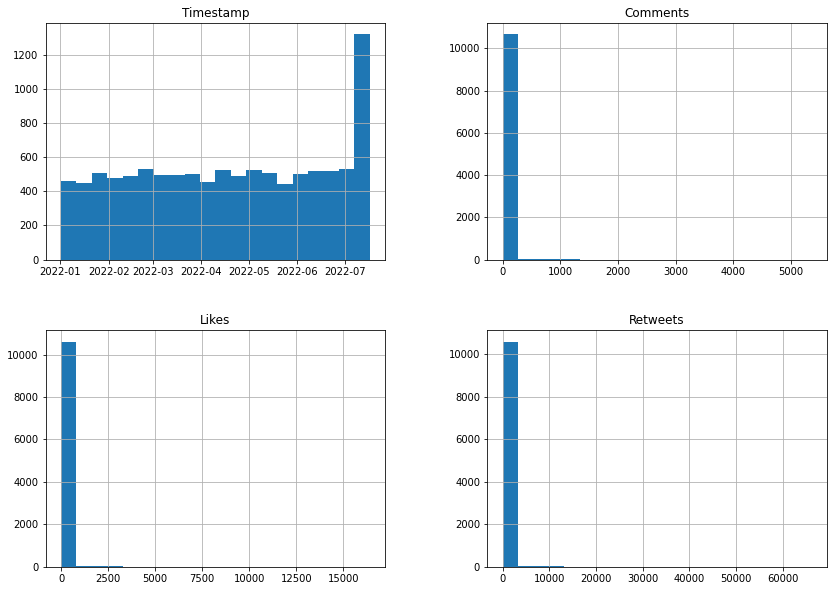

In [23]:
df_interim_p.hist(figsize=(14,10), bins=20)
plt.show()

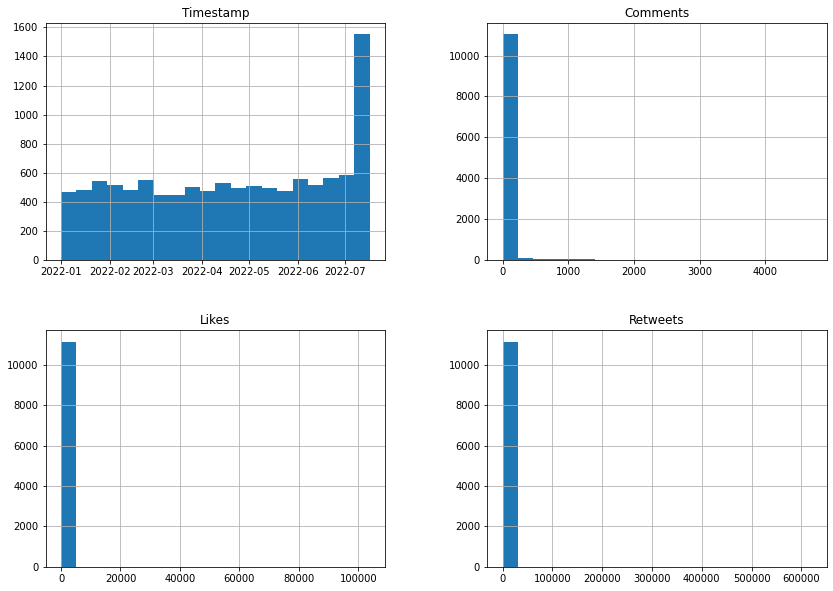

In [24]:
df_interim_z.hist(figsize=(14,10), bins=20)
plt.show()

Define more importan tweets on each dataframe, the rule is:

* For Putin tweets: Comments > 6 & Likes > 19 & Retweets > 70
* For Zelensky tweets: Comments > 3 & Likes > 11 & Retweets > 44

In [25]:
df_interim_p['Top_tweet'] = pd.Categorical(df_interim_p[['Comments', 'Likes', 'Retweets']].apply(lambda x: 1 if x.Comments > 6 and x.Likes > 19 and x.Retweets > 70 else 0, axis = 1))
print(df_interim_p['Top_tweet'].value_counts())

0    9369
1    1367
Name: Top_tweet, dtype: int64


In [26]:
df_interim_z['Top_tweet'] = pd.Categorical(df_interim_z[['Comments', 'Likes', 'Retweets']].apply(lambda x: 1 if x.Comments > 3 and x.Likes > 11 and x.Retweets > 44 else 0, axis = 1))
print(df_interim_z['Top_tweet'].value_counts())

0    9653
1    1498
Name: Top_tweet, dtype: int64


In [27]:
print(f"The total number of distinct users in Putin dataframe is {df_interim_p['UserName'].nunique()}")
print(f"The number of distinct users in the Putin top tweets dataframe is {df_interim_p['UserName'][df_interim_p['Top_tweet'] == 1].nunique()}")


The total number of distinct users in Putin dataframe is 8027
The number of distinct users in the Putin top tweets dataframe is 894


In [28]:
print(f"The total number of distinct users in Zelensky dataframe is {df_interim_z['UserName'].nunique()}")
print(f"The number of distinct users in the Zelensky top tweets dataframe is {df_interim_z['UserName'][df_interim_z['Top_tweet'] == 1].nunique()}")


The total number of distinct users in Zelensky dataframe is 8169
The number of distinct users in the Zelensky top tweets dataframe is 813


In [29]:
df_interim_p.sort_values(by = 'Likes', ascending = False)[['UserName','Tweet', 'Likes']][:10]

,UserName,Tweet,Likes
3805,@OccupyDemocrats,"BREAKING NEWS: In a major loss for Putin, NATO announces that it is sending an air defense system to Ukraine in order to help it fight off Russia’s bomber jets. RT TO THANK NATO FOR STANDING WITH UKRAINE!\n983\n16.4K\n54.8K",16400
6538,@DanRather,"If you are voting against aid for Ukraine, or you excuse away Putin’s murderous aggression, it might be a small tip off to what you really think of freedom and democracy.\n4,473\n13.9K\n66.1K",13900
4164,@davenewworld_2,Russians against Putin are waving a new flag without the red stripe to symbolize the removal of blood from the flag. This is a trend Putin won't want going viral in Russia.\n446\n11.4K\n36.5K,11400
6800,@TimothyDSnyder,"It is senseless to shelter Putin from the sense that he is losing. He will figure that out for himself, and he will act to protect himself. 1/17\n630\n11.3K\n36.7K",11300
4311,@atrupar,"Trump calls for Putin to release dirt on the Biden family right now since now ""he's not exactly a fan of our country"" during new interview with Real America's Voice\n5,356\n8,504\n15.5K",8504
4507,@LatestAnonPress,"It looks like scenes from a horror movie. But it is not!\nThis is the result of the murders of hundreds of civilians by Russian soldiers in Ukraine, in the town of #Bucha near #Kyiv.\n\nPUTIN NEEDS TO BE STOPPED NOW!\nThe following media includes potentially sensitive content. Change settings\nView\n956\n8,245\n22.8K",8245
5477,@POTUS,"As Russia continues to grind out brutalities against Ukraine, Putin is banking on us losing interest. He is betting that Western unity will crack.\n \nOnce again, we will prove him wrong.\n4,050\n7,985\n46K",7985
2439,@joncoopertweets,"President Biden’s steadfast broadcasting of Putin’s every move might be one of the savviest war-avoidance moves made by a president in a generation.\n1,525\n7,971\n55.3K",7971
10178,@JackPosobiec,"Did John Bolton realize he just publicly admitted the US does coups around the world - like Putin has been saying all along?\n896\n7,336\n29.5K",7336
9634,@JayinKyiv,"Warning on cigs in Ukraine now says you should quit smoking so you get to see how Putin dies.\n254\n6,177\n31.9K",6177


In [30]:
df_interim_p.sort_values(by = 'Retweets', ascending = False)[['UserName','Tweet', 'Retweets']][:10]

,UserName,Tweet,Retweets
6538,@DanRather,"If you are voting against aid for Ukraine, or you excuse away Putin’s murderous aggression, it might be a small tip off to what you really think of freedom and democracy.\n4,473\n13.9K\n66.1K",66100
2439,@joncoopertweets,"President Biden’s steadfast broadcasting of Putin’s every move might be one of the savviest war-avoidance moves made by a president in a generation.\n1,525\n7,971\n55.3K",55300
3805,@OccupyDemocrats,"BREAKING NEWS: In a major loss for Putin, NATO announces that it is sending an air defense system to Ukraine in order to help it fight off Russia’s bomber jets. RT TO THANK NATO FOR STANDING WITH UKRAINE!\n983\n16.4K\n54.8K",54800
5477,@POTUS,"As Russia continues to grind out brutalities against Ukraine, Putin is banking on us losing interest. He is betting that Western unity will crack.\n \nOnce again, we will prove him wrong.\n4,050\n7,985\n46K",46000
6800,@TimothyDSnyder,"It is senseless to shelter Putin from the sense that he is losing. He will figure that out for himself, and he will act to protect himself. 1/17\n630\n11.3K\n36.7K",36700
4164,@davenewworld_2,Russians against Putin are waving a new flag without the red stripe to symbolize the removal of blood from the flag. This is a trend Putin won't want going viral in Russia.\n446\n11.4K\n36.5K,36500
2755,@IAPonomarenko,"What’s happening now in Ukraine is absolutely unthinkable.\nAnd I still don’t get it why Russians obey Putin’s absolutely psychopathic orders.\n906\n5,185\n36.4K",36400
9634,@JayinKyiv,"Warning on cigs in Ukraine now says you should quit smoking so you get to see how Putin dies.\n254\n6,177\n31.9K",31900
10178,@JackPosobiec,"Did John Bolton realize he just publicly admitted the US does coups around the world - like Putin has been saying all along?\n896\n7,336\n29.5K",29500
6481,@McFaul,"I wish we were hearing more outrage from leaders in the Middle East and Africa about how Putin is showing zero concern about food supplies to your countries. Zero.\n710\n5,507\n29.4K",29400


In [31]:
df_interim_p.sort_values(by = 'Comments', ascending = False)[['UserName','Tweet', 'Comments']][:10]

,UserName,Tweet,Comments
4311,@atrupar,"Trump calls for Putin to release dirt on the Biden family right now since now ""he's not exactly a fan of our country"" during new interview with Real America's Voice\n5,356\n8,504\n15.5K",5356
8888,@POTUS,"We could have turned a blind eye to Putin’s barbaric war against Ukraine and the price of gas wouldn’t have spiked the way it has, but America rose to the moment.\n\nWe proudly stand with Ukraine.\n5,165\n3,446\n17.6K",5165
6538,@DanRather,"If you are voting against aid for Ukraine, or you excuse away Putin’s murderous aggression, it might be a small tip off to what you really think of freedom and democracy.\n4,473\n13.9K\n66.1K",4473
5477,@POTUS,"As Russia continues to grind out brutalities against Ukraine, Putin is banking on us losing interest. He is betting that Western unity will crack.\n \nOnce again, we will prove him wrong.\n4,050\n7,985\n46K",4050
3952,@joncoopertweets,"I’m curious. On a scale of 1 to 10, how badly do you want Putin's invasion of Ukraine to end up being the most historical embarrassment Russia has ever initiated?\n2,821\n1,767\n18.6K",2821
6996,@AnonOpsSE,"Looks like Putin has start wearing bulletproof vest.\n1,729\n4,413\n23.8K",1729
2439,@joncoopertweets,"President Biden’s steadfast broadcasting of Putin’s every move might be one of the savviest war-avoidance moves made by a president in a generation.\n1,525\n7,971\n55.3K",1525
949,@B52Malmet,"Does Tucker Carlson have a soft spot for Vladimir Putin?\n1,294\n750\n5,487",1294
541,@marcorubio,"It is now almost certain that Putin will attempt to occupy at least parts of Ukraine very soon\n1,290\n486\n1,735",1290
4003,@JustinTrudeau,"Sat down with Prime Minister \n@MarinSanna\n this afternoon. We’re united against Putin’s attack on Ukraine, and in support of the Ukrainian people. And we’ll keep working together to coordinate our ongoing response and to advance our shared priorities – such as climate change.\n1,109\n313\n2,084",1109


In [32]:
df_interim_z.sort_values(by = 'Likes', ascending = False)[['UserName','Tweet', 'Likes']][:10]

,UserName,Tweet,Likes
2882,@BenjaminRamm,"During his inaugural address in 2019, Zelensky told lawmakers: “I do not want my picture in your offices: the President is not an icon, an idol or a portrait. Hang your kids' photos instead, and look at them each time you are making a decision.”\n3,335\n103.9K\n620K",103900
2723,@antontroian,"Zelensky addressing the Russian people in Russian now: \n“Today I initiated a phone call with the president of the Russian Federation. The result was silence, though the silence should be in the Donbas. As a result I want to address all citizens of Russia…\n269\n10.7K\n29.8K",10700
4028,@KyivIndependent,"Zelensky to Russian pilots:\n\n""I want to repeat once again to all Russian pilots who do not think about the orders they carry out: Killing civilians is a crime, and you will pay,"" Zelensky said. ""Today or tomorrow is less important. The main thing is that it's inevitable.""\n352\n9,922\n49.3K",9922
4606,@ChristopherJM,"Powerful, passionate address from Zelensky tonight. Switching from Ukrainian to Russian he addresses mothers of soldiers who committed horrific war crimes in Bucha, Irpin, Hostomel, asking how they raised “butchers,” and he tells Moscow to see how it’s orders are being fulfilled.\n604\n9,811\n27.7K",9811
3542,@joshscampbell,"Still stunning in hindsight...\n\nZelensky: ""We are ready to continue to cooperate for the next steps, specifically we are almost ready to buy more Javelins from the United States for defense purposes.""\n\nTrump: ""I would like you to do us a favor though...""\ncnn.com\nRead Trump's phone conversation with Volodymyr Zelensky | CNN Politics\nPresident Donald Trump repeatedly pushed for Ukrainian President Volodymr Zelensky to investigate former Vice President Joe Biden, and his son, Hunter, during a July 25 phone call, according to a...\n584\n8,565\n24.2K",8565
1529,@Jim_Jordan,"Why isn’t the media demanding that President Biden release the transcript of his call with President Zelensky? \n\nWhat happened to transparency?\n\nOr does that only matter when President Trump is in office?\n4,276\n8,113\n33.4K",8113
3181,@BrianKarem,"NOW: Ukrainian President Zelensky releases a video statement to counter Russian propaganda that he's fled his country.\n474\n7,134\n49.2K",7134
5427,@KyivIndependent,"Zelensky: 'If we had access to all the weapons we need, which our partners have, we would have already ended this war.' \n\nZelensky renewed calls for weapons to Ukraine, saying “it is unfair that Ukraine is still forced to ask for what its partners have been storing for years.”\n701\n6,647\n31.1K",6647
6140,@KyivIndependent,"Zelensky: Ukraine seeks full restoration of territory, including Crimea. \n\nSpeaking at the WSJ's CEO Council Summit on May 3, President Zelensky said Ukraine's goals are to halt Russia’s advance, reclaim territory, and to restore Ukraine’s entire territory through diplomacy.\n706\n6,453\n37.1K",6453
5555,@DAlperovitch,"Zelensky throwing serious shade tonight:\n“You know they (Russians) used to talk about their biggest dream: to see Paris and die… their dream now is to steal a toilet and die""\n329\n5,829\n26.2K",5829


In [37]:
df_interim_z.sort_values(by = 'Retweets', ascending = False)[['UserName','Tweet', 'Retweets']][:10]

,UserName,Tweet,Retweets
2882,@BenjaminRamm,"During his inaugural address in 2019, Zelensky told lawmakers: “I do not want my picture in your offices: the President is not an icon, an idol or a portrait. Hang your kids' photos instead, and look at them each time you are making a decision.”\n3,335\n103.9K\n620K",620000
7830,@ZelenskyyUa,"Congratulations on the Platinum anniversary of the reign of the Queen of Her Majesty Elizabeth II \n@RoyalFamily\n. Grateful for supporting in the fight for our freedom and independence. I wish Her Majesty well-being and peace and prosperity to people.\n1,006\n5,623\n65.9K",65900
4028,@KyivIndependent,"Zelensky to Russian pilots:\n\n""I want to repeat once again to all Russian pilots who do not think about the orders they carry out: Killing civilians is a crime, and you will pay,"" Zelensky said. ""Today or tomorrow is less important. The main thing is that it's inevitable.""\n352\n9,922\n49.3K",49300
3181,@BrianKarem,"NOW: Ukrainian President Zelensky releases a video statement to counter Russian propaganda that he's fled his country.\n474\n7,134\n49.2K",49200
6140,@KyivIndependent,"Zelensky: Ukraine seeks full restoration of territory, including Crimea. \n\nSpeaking at the WSJ's CEO Council Summit on May 3, President Zelensky said Ukraine's goals are to halt Russia’s advance, reclaim territory, and to restore Ukraine’s entire territory through diplomacy.\n706\n6,453\n37.1K",37100
9277,@ZelenskyyUa,"I commend US historic decision to provide UA with new security assistance package, including modern air defense systems. Thank you \n@POTUS\n for your continued leadership and support of UA in its fight against the aggressor. Together towards the victory!\n1,147\n4,899\n34.9K",34900
1529,@Jim_Jordan,"Why isn’t the media demanding that President Biden release the transcript of his call with President Zelensky? \n\nWhat happened to transparency?\n\nOr does that only matter when President Trump is in office?\n4,276\n8,113\n33.4K",33400
5427,@KyivIndependent,"Zelensky: 'If we had access to all the weapons we need, which our partners have, we would have already ended this war.' \n\nZelensky renewed calls for weapons to Ukraine, saying “it is unfair that Ukraine is still forced to ask for what its partners have been storing for years.”\n701\n6,647\n31.1K",31100
7186,@KyivIndependent,"Zelensky: 'Russia will also have to leave Crimea.' \n\nPresident Zelensky said during his daily address that Russia will also have to leave Kherson, Melitopol, Enerhodar, Mariupol, and ""all other cities and communities where they are still pretending to be the owners.”\n658\n5,148\n30.8K",30800
2723,@antontroian,"Zelensky addressing the Russian people in Russian now: \n“Today I initiated a phone call with the president of the Russian Federation. The result was silence, though the silence should be in the Donbas. As a result I want to address all citizens of Russia…\n269\n10.7K\n29.8K",29800


In [33]:
df_interim_z.sort_values(by = 'Comments', ascending = False)[['UserName','Tweet', 'Comments']][:10]

,UserName,Tweet,Comments
6085,@llambchops,"Zelensky posing with Pelosi and Schiff makes me wonder about him and this whole operation. \n\nWhat do you think? Are we being played?\n4,698\n3,026\n13.7K",4698
1529,@Jim_Jordan,"Why isn’t the media demanding that President Biden release the transcript of his call with President Zelensky? \n\nWhat happened to transparency?\n\nOr does that only matter when President Trump is in office?\n4,276\n8,113\n33.4K",4276
5215,@GodandtheBear,"Zelensky on tv saying we shouldn't be scared of nukes, we should be ready? Can anyone explain how you get ready to be nuked?\n3,546\n4,851\n29.7K",3546
9510,Jordan Schachtel @ dossier.substack.com,"Zelensky just said Ukraine is gonna need a cool $750 billion to keep his country running. \n3,446\n4,843\n18K",3446
2882,@BenjaminRamm,"During his inaugural address in 2019, Zelensky told lawmakers: “I do not want my picture in your offices: the President is not an icon, an idol or a portrait. Hang your kids' photos instead, and look at them each time you are making a decision.”\n3,335\n103.9K\n620K",3335
8513,@BorisJohnson,"Putin’s grand imperial design for the total reconquest of Ukraine has been derailed.\n\nThere are four vital steps we must take to strengthen the hand of our Ukrainian friends and ensure we finish this war on the terms that \n@ZelenskyyUa\n has laid out.\nthetimes.co.uk\nThe Times & The Sunday Times\nNews and opinion from The Times & The Sunday Times\n2,453\n2,319\n12.5K",2453
1896,@Acyn,"Jim Jordan, who is refusing to testify about his phone call with Trump, asks why won’t Biden release the transcript of his phone call with Zelensky and complains the elite left get to abide by a certain set of rules and “we regular folk got to follow another set”\n1,505\n1,105\n4,069",1505
3792,@cov_Gretchen,"Does Zelensky have a $34 MILLION DOLLAR HOME in Miami?! I do not like any of this. There is too much corruption and seems like we are footing the bill.\n\nCan someone fact check?\n1,315\n2,533\n12.7K",1315
10211,@ZelenskyyUa,"Held talks with President \n@RTErdogan\n. Thanked for condolences over new civilian victims of the Russian aggression. We appreciate support. Discussed the importance of unblocking ports and resuming grain exports. We must also prevent Russia from taking our grain from TOT.\n1,213\n2,006\n15.8K",1213
3541,@DAlperovitch,"4 possible ways this war ends in order of likelihood:\n1. Long term fight/insurgency with destruction of Ukrainian cities\n2. Putin declares limited demilitarization/“denazification” victory and pulls out\n3. Zelensky compromises on NATO and Crimea\n4. Putin replaced in palace coup\n1,208\n2,133\n10.7K",1208


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


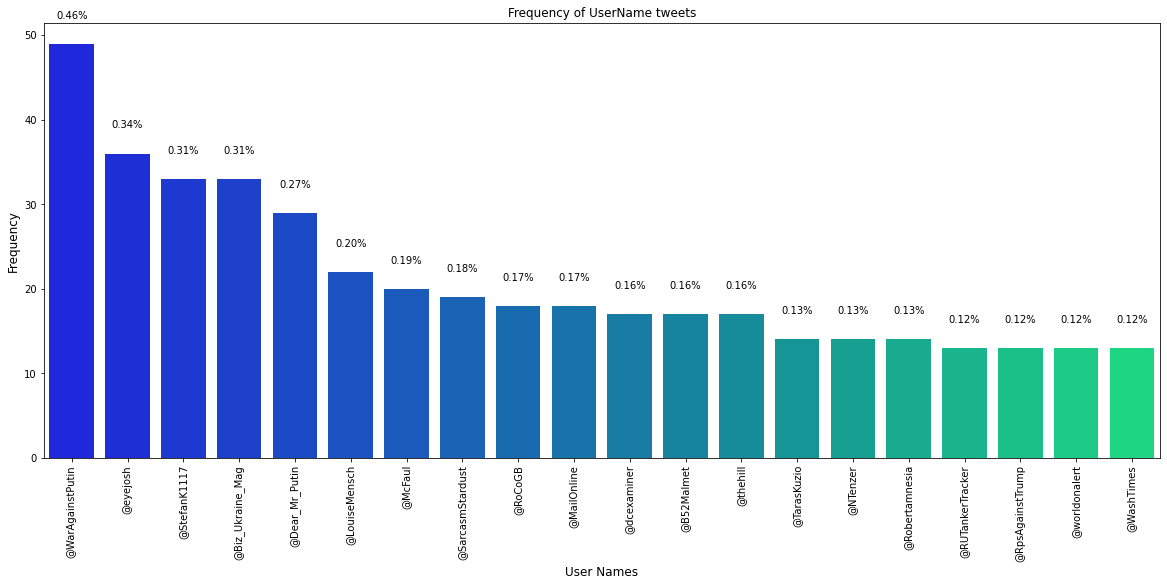

In [34]:
utils.plot_frequency_charts(df_interim_p, 'UserName', 'User Names','winter')

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


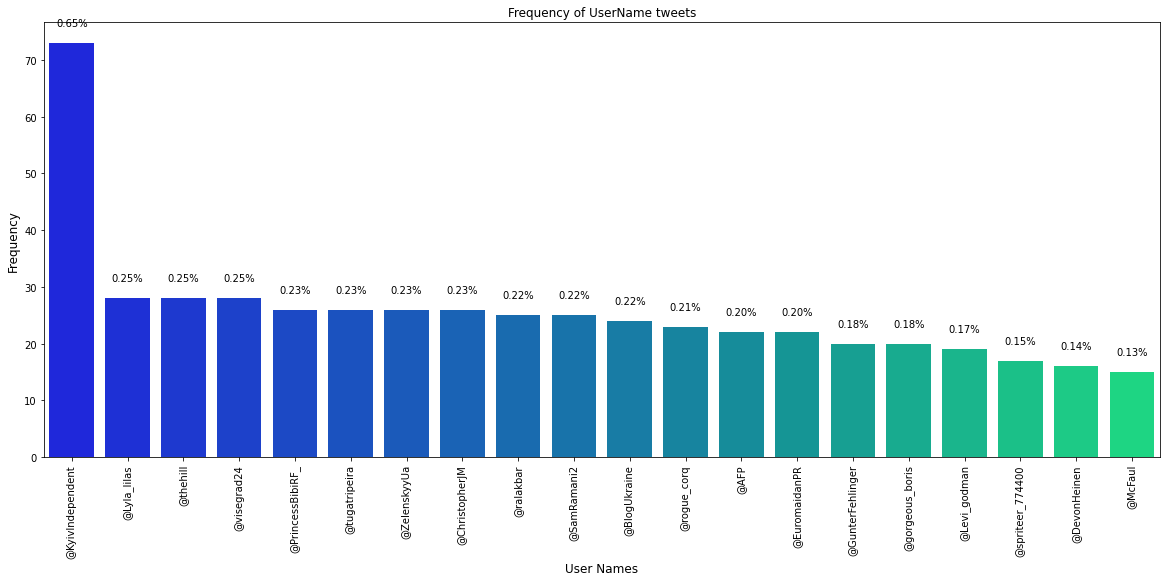

In [35]:
utils.plot_frequency_charts(df_interim_z, 'UserName', 'User Names','winter')

In [36]:
# save interim dataframes
df_interim_p.to_csv('../data/interim/Putin_tweets.csv', index=False)
df_interim_z.to_csv('../data/interim/Zelensky_tweets.csv', index=False)

In [38]:
# common words in Putin's dataframe
print(df_interim_p['Clean_Tweet'].str.split(expand = True).stack().value_counts()[:30])

putin        13058
ukraine       4188
russia        3070
russian       2402
war           2058
say           1603
com           1461
trump         1263
vladimir      1242
president     1122
would         1120
us            1072
biden         1021
like           957
go             905
get            882
people         874
nato           791
want           780
think          775
know           771
make           758
world          745
take           724
one            714
invasion       638
call           580
time           569
invade         565
state          517
dtype: int64


In [39]:
# common words in Zelensky's dataframe
df_interim_z['Clean_Tweet'].str.split(expand = True).stack().value_counts()[:30]

ukraine      5190
zelensky     4924
president    2381
russia       2139
others       1953
ukrainian    1564
war          1458
russian      1381
say          1340
putin        1332
people       1080
com           932
us            904
volodymyr     816
support       765
world         738
would         706
country       699
need          696
get           659
like          648
go            644
biden         634
time          625
make          608
one           590
give          555
call          553
know          552
thank         545
dtype: int64

In [40]:
# define common words to omit
common_words = ['vladimir', 'putin', 'volodymyr', 'zelensky', 'russia', 'russian', 'russians', 'ukraine', 'ukrainian', 'president', 'u'] 

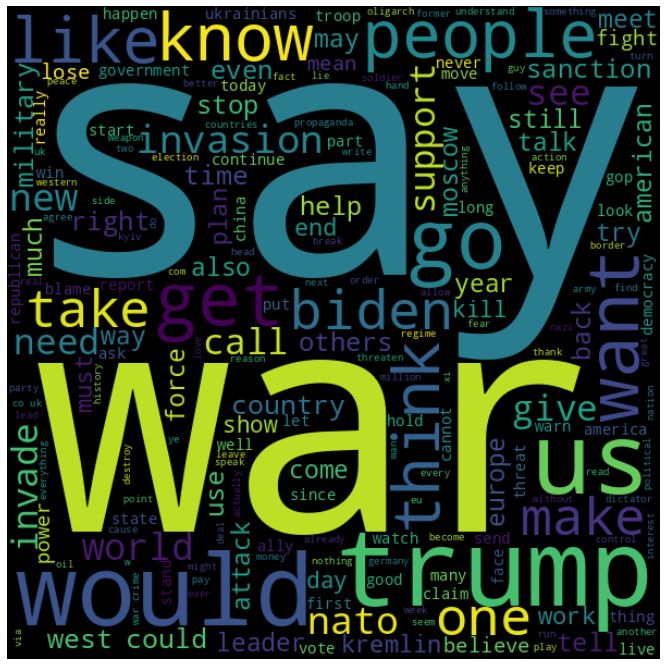

In [41]:
# Putin WordCloud (1 word)
wordcloud = WordCloud(width=600, height=600, stopwords=common_words).generate(' '.join(i for i in df_interim_p.Clean_Tweet))
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud, interpolation = 'bilinear') # interpolation = 'bilinear' lo habíamos sacado, no sé por qué
plt.axis("off")
plt.show()

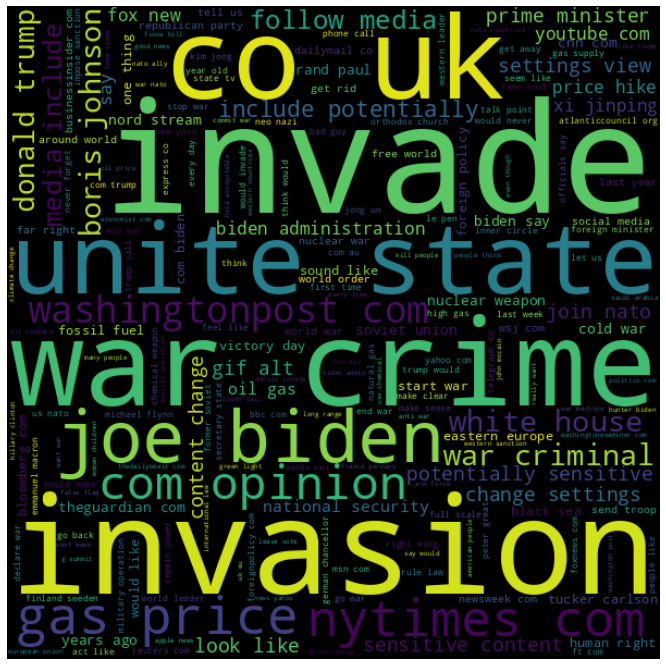

In [42]:
# Putin WordCloud (2 words)
wordcloud = WordCloud(width=600, height=600, collocation_threshold = 2, stopwords=common_words).generate(' '.join(i for i in df_interim_p.Clean_Tweet))
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

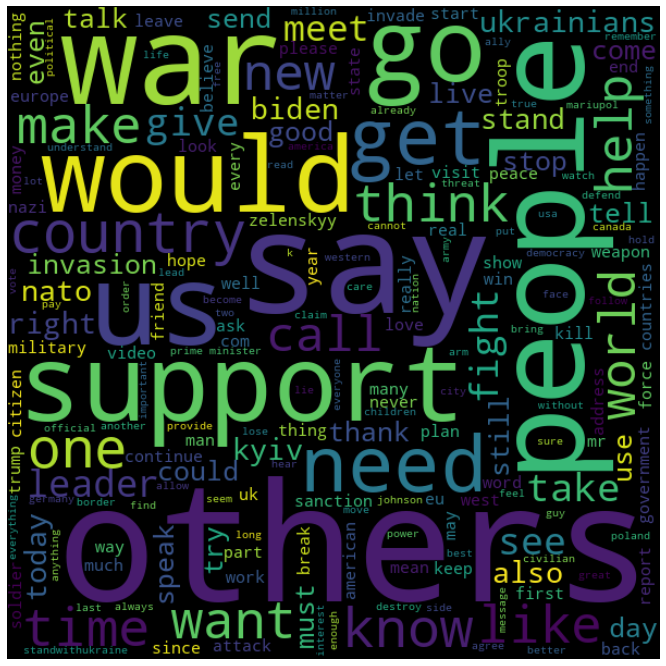

In [43]:
# Zelensky WordCloud (1 word)
wordcloud = WordCloud(width=600, height=600, stopwords=common_words).generate(' '.join(i for i in df_interim_z.Clean_Tweet))
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

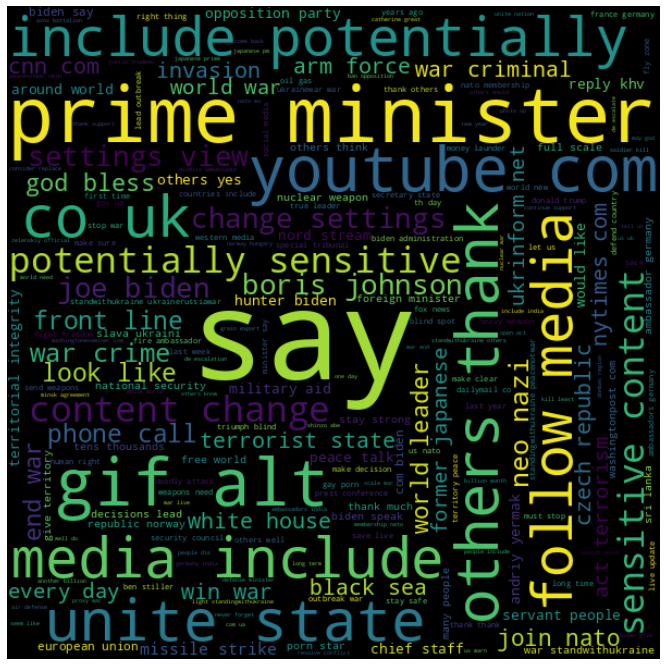

In [44]:
# Zelensky WordCloud (2 words)
wordcloud = WordCloud(width=600, height=600, collocation_threshold = 2, stopwords=common_words).generate(' '.join(i for i in df_interim_z.Clean_Tweet))
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

Check the frequency of word "putin" appear in Zelensky dataframe

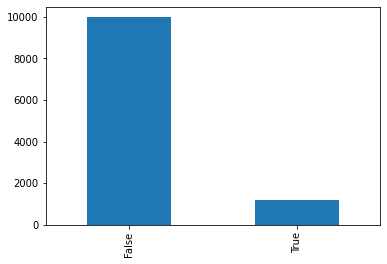

In [45]:
putin_in_zelenzky = df_interim_z['Clean_Tweet'].apply(lambda x: True if 'putin' in x else False)
putin_in_zelenzky.value_counts().plot.bar()
plt.show()

Check the frequency of word "zelensky" appear in Putin dataframe

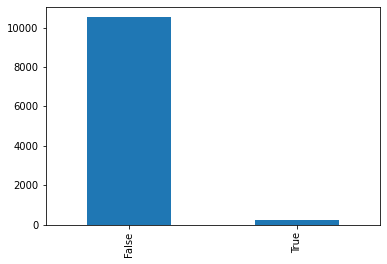

In [46]:
zelenzky_in_putin = df_interim_p['Clean_Tweet'].apply(lambda x: True if 'zelensky' in x else False)
zelenzky_in_putin.value_counts().plot.bar()
plt.show()

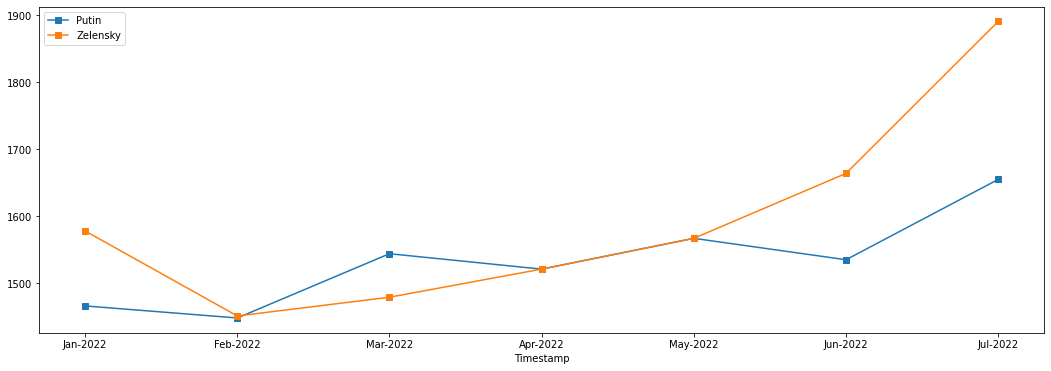

In [47]:
# Plot number of tweets from each president by month
plt.figure(figsize=(18,6))
df_interim_p.groupby(pd.to_datetime(df_interim_p['Timestamp']).dt.strftime('%b-%Y'), sort=False)['Clean_Tweet'].size().plot(label= 'Putin', marker = 's')
df_interim_z.groupby(pd.to_datetime(df_interim_z['Timestamp']).dt.strftime('%b-%Y'), sort=False)['Clean_Tweet'].size().plot(label= 'Zelensky', marker = 's')
plt.legend()
plt.show()

## Different libraries to apply sentiment analysis

### **vader**

In [48]:
sentiments = SentimentIntensityAnalyzer()

df_interim_p["vader_Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df_interim_p["Clean_Tweet"]]
df_interim_p["vader_Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df_interim_p["Clean_Tweet"]]
df_interim_p["vader_Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df_interim_p["Clean_Tweet"]]
df_interim_p['vader_Compound'] = [sentiments.polarity_scores(i)["compound"] for i in df_interim_p["Clean_Tweet"]]

df_interim_z["vader_Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df_interim_z["Clean_Tweet"]]
df_interim_z["vader_Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df_interim_z["Clean_Tweet"]]
df_interim_z["vader_Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df_interim_z["Clean_Tweet"]]
df_interim_z['vader_Compound'] = [sentiments.polarity_scores(i)["compound"] for i in df_interim_z["Clean_Tweet"]]

In [49]:
# add sentiment according to polarity
score_p = df_interim_p["vader_Compound"].values
sentiment_p = []
for i in score_p:
    if i >= 0.05 :
        sentiment_p.append('Positive')
    elif i <= -0.05 :
        sentiment_p.append('Negative')
    else:
        sentiment_p.append('Neutral')
df_interim_p["vader_Sentiment"] = sentiment_p

score_z = df_interim_z["vader_Compound"].values
sentiment_z = []
for i in score_z:
    if i >= 0.05 :
        sentiment_z.append('Positive')
    elif i <= -0.05 :
        sentiment_z.append('Negative')
    else:
        sentiment_z.append('Neutral')
df_interim_z["vader_Sentiment"] = sentiment_z

In [55]:
print(df_interim_p["vader_Sentiment"].value_counts())

Negative    5280
Positive    3988
Neutral     1468
Name: vader_Sentiment, dtype: int64


In [56]:
print(df_interim_z["vader_Sentiment"].value_counts())

Positive    5231
Negative    4018
Neutral     1902
Name: vader_Sentiment, dtype: int64


### **textblob**

In [57]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

df_interim_p['textblob_Polarity'] = df_interim_p['Clean_Tweet'].apply(get_polarity)
df_interim_z['textblob_Polarity'] = df_interim_z['Clean_Tweet'].apply(get_polarity)

In [58]:
# add sentiment according to polarity

df_interim_p['textblob_Sentiment']=''
df_interim_p.loc[df_interim_p.textblob_Polarity>0,'textblob_Sentiment']='Positive'
df_interim_p.loc[df_interim_p.textblob_Polarity==0,'textblob_Sentiment']='Neutral'
df_interim_p.loc[df_interim_p.textblob_Polarity<0,'textblob_Sentiment']='Negative'

df_interim_z['textblob_Sentiment']=''
df_interim_z.loc[df_interim_z.textblob_Polarity>0,'textblob_Sentiment']='Positive'
df_interim_z.loc[df_interim_z.textblob_Polarity==0,'textblob_Sentiment']='Neutral'
df_interim_z.loc[df_interim_z.textblob_Polarity<0,'textblob_Sentiment']='Negative'

In [59]:
print(df_interim_p["textblob_Sentiment"].value_counts())

Positive    4606
Negative    3082
Neutral     3048
Name: textblob_Sentiment, dtype: int64


In [60]:
print(df_interim_z["textblob_Sentiment"].value_counts())

Positive    4894
Neutral     3944
Negative    2313
Name: textblob_Sentiment, dtype: int64


### **flair**

In [61]:
sentiment_model = flair.models.TextClassifier.load('en-sentiment')

2022-08-25 15:04:25,581 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmpu2421aox


100%|██████████| 265512723/265512723 [00:15<00:00, 17193708.55B/s]

2022-08-25 15:04:41,523 copying /tmp/tmpu2421aox to cache at /home/gitpod/.flair/models/sentiment-en-mix-distillbert_4.pt


2022-08-25 15:04:41,734 removing temp file /tmp/tmpu2421aox
2022-08-25 15:04:41,772 loading file /home/gitpod/.flair/models/sentiment-en-mix-distillbert_4.pt


In [62]:
sentiment_p = []
confidence_p = []

for sentence in df_interim_p['Clean_Tweet']:
	if sentence.strip() == "":
		sentiment_p.append("")
		confidence_p.append("")
	else:
		sample = flair.data.Sentence(sentence)
		sentiment_model.predict(sample)

		sentiment_p.append(sample.labels[0].value)
		confidence_p.append(sample.labels[0].score)

In [63]:
df_interim_p['flair_Sentiment'] = sentiment_p
df_interim_p['flair_Confidence'] = confidence_p

In [64]:
sentiment_z = []
confidence_z = []

for sentence in df_interim_z['Clean_Tweet']:
	if sentence.strip() == "":
		sentiment_z.append("")
		confidence_z.append("")
	else:
		sample = flair.data.Sentence(sentence)
		sentiment_model.predict(sample)

		sentiment_z.append(sample.labels[0].value)
		confidence_z.append(sample.labels[0].score)

In [65]:
df_interim_z['flair_Sentiment'] = sentiment_z
df_interim_z['flair_Confidence'] = confidence_z

In [66]:
print(df_interim_p["flair_Sentiment"].value_counts())

NEGATIVE    9014
POSITIVE    1722
Name: flair_Sentiment, dtype: int64


In [67]:
print(df_interim_z["flair_Sentiment"].value_counts())

NEGATIVE    7275
POSITIVE    3876
Name: flair_Sentiment, dtype: int64


Show the results

In [69]:
df_interim_p.sample(10)

,Timestamp,UserName,Comments,Likes,Retweets,Is_response,Quote_another,Tweet,Clean_Tweet,Top_tweet,vader_Positive,vader_Negative,vader_Neutral,vader_Compound,vader_Sentiment,textblob_Polarity,textblob_Sentiment,flair_Sentiment,flair_Confidence
3442,2022-03-11 23:54:06,@Robertamnesia,3,1,8,0,1,"This tweet has the absolute best replies I've ever read on here. Fantastic.\n@FakaktaSouth\n @Rddedhd\n @donald_j_putin\n @MotorCityDolls\n @itwaslikemagic1\n @realmattcooke\n @lovesthetruth8\n @StephenCrane71\n @Rick90631\nQuote Tweet\nDan Duvall\n@lazerdoov\n · Mar 10\nSo sad that kids today spend so much time online. When we were kids we were always outside throwing rocks at one another, smoking, lighting small fires, stealing car hood ornaments, shoplifting, trying drugs... one time I drank gasoline.\nShow this thread\n3\n1\n8",tweet absolute best reply ever read fantastic,0,0.609,0.000,0.391,0.8316,Positive,0.533333,Positive,POSITIVE,0.948461
3436,2022-03-11 23:56:14,@JJ_Brownbridge,8,2,6,1,0,"Replying to \n@JJ_Brownbridge\n @MikeWJJF1\n and \n@JohnLewisEU\nMethinks Mike and his ilk have taken umbrage at the fact Brexit was unequivocally Russian foreign policy but also bankrolled by Putin. It's for them a double painful whammy in that Brexit has failed the UK and was a Russian project, were it not disastrous it would be funny.\n8\n2\n6",methinks mike ilk take umbrage fact brexit unequivocally russian foreign policy also bankroll putin double painful whammy brexit fail uk russian project disastrous would funny,0,0.085,0.301,0.614,-0.8126,Negative,-0.221875,Negative,NEGATIVE,0.997643
3190,2022-03-06 23:57:51,@jojolbaker,2,2,7,0,1,"I'm all in for this, problem is, you're dealing with the Putin. I have trust issues.\nQuote Tweet\nAlexander S. Vindman\n@AVindman\n · Mar 7\nOkay, rather than a “no fly zone,” let’s do a “secure humanitarian corridor.”\n2\n2\n7",problem deal putin trust issue,0,0.367,0.300,0.333,0.1531,Positive,0.000000,Neutral,NEGATIVE,0.547440
10552,2022-07-15 08:50:03,@FoxNews,231,75,187,0,0,"Biden adviser: Delta, Omicron variants and Putin to blame for economy\nfoxnews.com\nBiden adviser: Delta, Omicron variants and Putin to blame for economy\nBiden administration leadership and policies have led to skyrocketing gas prices and inflation nationwide, a problem which adviser Gene Sperling blames on COVID and Putin.\n231\n75\n187",biden adviser delta omicron variants putin blame economy foxnews com biden adviser delta omicron variants putin blame economy biden administration leadership policies lead skyrocket gas price inflation nationwide problem adviser gene sperling blame covid putin,1,0.000,0.242,0.758,-0.8360,Negative,0.000000,Neutral,NEGATIVE,0.999462
4114,2022-03-24 23:53:01,@BoxxOfMeng,3,2,4,1,0,"Replying to \n@captainkudzu\nGood piece but it's missing the threat to Israel that the Russian Ambassador to Syria made today. I think Putin may have actually lost it if he thinks he's going to fight Ukraine and Israel at the same time,lol.\njpost.com\nRussian ambassador to Syria: Israel is provoking us to react\nThe Russian ambassador complained that Israeli strikes aim to ""escalate tensions and allow the West to carry out military activities in Syria.""\n3\n2\n4",good piece miss threat israel russian ambassador syria make today think putin may actually lose think go fight ukraine israel time lol jpost com russian ambassador syria israel provoke us react russian ambassador complain israeli strike aim escalate tensions allow west carry military activities syria,0,0.124,0.321,0.555,-0.8779,Negative,0.200000,Positive,NEGATIVE,0.998639
416,2022-01-09 23:06:58,@BillChristeson,1,1,6,1,0,"Replying to \n@youngmanpurdue\n and \n@maggieNYT\nYes. He admitted to them in court as part of his deal. Wasn’t pardoned for those. And, since Mueller & the Senate report, Treasury reported the internal polling and analysis he gave agent Kilimnik got passed on up the line within Russian intelligence. Putin’s man in the campaign.\n1\n1\n6",yes ad

In [70]:
df_interim_z.sample(10)

,Timestamp,UserName,Comments,Likes,Retweets,Is_response,Quote_another,Tweet,Clean_Tweet,Top_tweet,vader_Positive,vader_Negative,vader_Neutral,vader_Compound,vader_Sentiment,textblob_Polarity,textblob_Sentiment,flair_Sentiment,flair_Confidence
9814,2022-07-08 21:49:23,@AgenciaAJN,0,2,6,0,0,"Zelensky thanked Biden for support for Ukraine during Russian invasion \n@ZelenskyyUa\n @POTUS\n @JoeBiden\n @KremlinRussia_E\n #Putin #Rusia #EstadosUnidos #Ukraine #Russia #UnitedStates \n@AndriyYermak\n #UkraineRussiaWar #UkraineUnderAttack\nagenciaajn.com\nZelensky agradeció a Biden por el apoyo a Ucrania durante la invasión rusa\n“Verdaderamente agradecido con Estados Unidos, el presidente Biden y el pueblo de norteamericano, por continuar apoyando a Ucrania en la lucha contra la agresión rusa”, expresó Zelensky\n2\n6",zelensky thank biden support ukraine russian invasion putin rusia estadosunidos ukraine russia unitedstates ukrainerussiawar ukraineunderattack agenciaajn com zelensky agradeci biden por el apoyo ucrania durante la invasi n rusa verdaderamente agradecido con estados unidos el presidente biden el pueblo de norteamericano por continuar apoyando ucrania en la lucha contra la agresi n rusa expres zelensky,0,0.093,0.000,0.907,0.6369,Positive,0.00,Neutral,POSITIVE,0.950514
4217,2022-03-26 22:39:06,@AdamParkhomenko,153,976,10900,0,0,Once Zelensky is finished taking care of Putin I think there is a whole list of world problems this guy could help solve.\n153\n976\n10.9K,zelensky finish take care putin think whole list world problems guy could help solve k,1,0.377,0.132,0.490,0.6124,Positive,0.20,Positive,POSITIVE,0.922723
1607,2022-02-01 21:47:01,@karl_trotsky,0,2,5,1,0,Replying to \n@PeterKirstein\n @NATO\n and \n@ZelenskyyUa\nI couldn't agree more. It takes one sentence from Ukraine and or NATO to de-escalate the situation. The dick swinging posturing of those sending troops and arms is nothing short of obscene.\n2\n5,could agree take one sentence ukraine nato de escalate situation dick swing posture send troop arm nothing short obscene,0,0.273,0.131,0.596,0.3761,Positive,0.00,Neutral,NEGATIVE,0.999795
1079,2022-01-22 23:56:35,@bonchieredstate,3,33,117,0,1,"Vindman has spent the last week trashing Zelensky because he’s a shameless hack who never actually cared about Ukraine. Vindman exists to lick the boots of Democrats. It was always a scam.\nQuote Tweet\nAlexander S. Vindman\n@AVindman\n · Nov 7, 2020\nThis from President Zelensky @ZelenskyyUa of Ukraine. What a relief it must be for him and his people, hopeful for a return to normalcy and a strong partnership with America. You now have a partner for reforms and anti-corruption efforts and for strengthening UA’s sovereignty. twitter.com/ZelenskyyUa/st…\n3\n33\n117",vindman spend last week trash zelensky shameless hack never actually care ukraine vindman exist lick boot democrats always scam,0,0.000,0.353,0.647,-0.8284,Negative,0.00,Neutral,NEGATIVE,0.999987
5105,2022-04-12 23:05:56,@realmagnussrm,2,0,6,1,0,Replying to \n@ZelenskyyUa\n and \n@POTUS\nGood on you for not welcoming Steinmeier in Kyiv today! That was well deserved. Might make us Germans realise a bit more how bad our image is in Eastern Europe and Ukraine especially\n2\n6,good welcome steinmeier kyiv today well deserve might make us germans realise bite bad image eastern europe ukraine especially,0,0.302,0.132,0.566,0.5423,Positive,0.20,Positive,NEGATIVE,0.652467
7023,2022-05-20 22:32:08,@ricarduslordhi1,2,0,4,1,0,Replying to \n@SetTheorist\n @IuliiaMendel\n and \n@ZelenskyyUa\nRussians have the best air defence systems in the world. This was suicide. Ukraine getting air defences from outside would have changed nothing.\n2\n4,russians best air defence systems world suicide ukraine get air defences outside would change nothing,0,0.251,0.256,0.493,-0.0258,Neutral,0.50,Positive,POSITIVE,0.800689
8805,2022-06-23 21:50:34,@Astartiel,1,4,6,1,0,Replying to \n@ZelenskyyUa\n @CharlesMichel\n and \n@vonderleyen\nI would lik

Save to processed folder

In [68]:
# save final dataframes
df_interim_p.to_csv('../data/processed/Putin_tweets.csv', index=False)
df_interim_z.to_csv('../data/processed/Zelensky_tweets.csv', index=False)